In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [84]:
def distance(p1, p2):
    '''
    Find the distance between points 
    p1 and p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

def magority_vote(votes):
    '''
    Finds the winner. If there is a tie among winners, the 
    program choose radomly
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

In [35]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
points

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]])

In [36]:
p = np.array([2.5, 2])
p

array([ 2.5,  2. ])

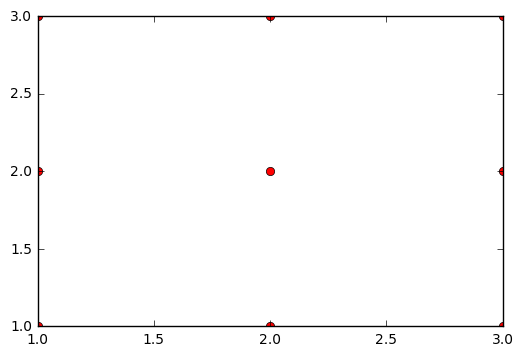

In [37]:
plt.plot(points[:,0], points[:,1], 'ro')
plt.show()

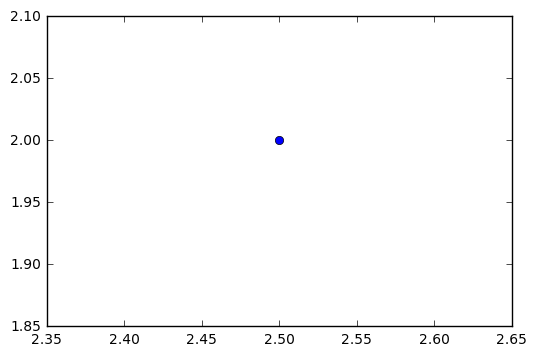

In [38]:
plt.plot(p[0], p[1], 'bo')
plt.show()

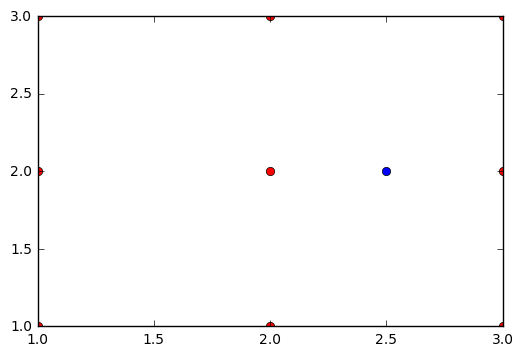

In [39]:
plt.plot(points[:,0], points[:,1], 'ro')
plt.plot(p[0], p[1], 'bo')
plt.show()

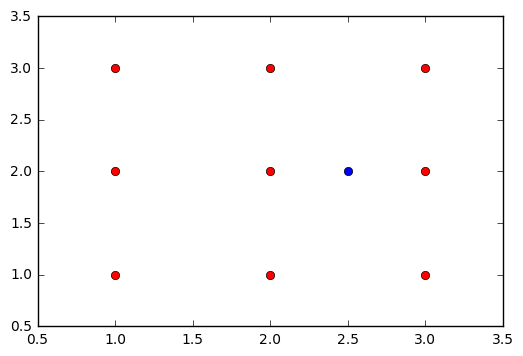

In [42]:
plt.plot(points[:,0], points[:,1], 'ro')
plt.plot(p[0], p[1], 'bo')
plt.axis([0.5,3.5,0.5,3.5])
plt.show()

In [43]:
distances = np.zeros(points.shape[0])

In [44]:
distances

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [48]:
distances = np.zeros(points.shape[0])
#loop over all points
for i in range(len(distances)):
    #compute the distance beetween point p and every other point
    distances[i] = distance(p, points[i])

In [49]:
distances

array([ 1.80277564,  1.5       ,  1.80277564,  1.11803399,  0.5       ,
        1.11803399,  1.11803399,  0.5       ,  1.11803399])

In [50]:
points[4]

array([2, 2])

In [52]:
distances[4]

0.5

In [53]:
points[7]

array([3, 2])

In [55]:
distances[7]

0.5

In [56]:
np.argsort(distances)

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [57]:
ind = np.argsort(distances)

In [58]:
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [59]:
distances[ind]

array([ 0.5       ,  0.5       ,  1.11803399,  1.11803399,  1.11803399,
        1.11803399,  1.5       ,  1.80277564,  1.80277564])

In [60]:
distances[ind[0:2]]

array([ 0.5,  0.5])

In [74]:
def find_nearest_neighbors(p, points, k = 5):
    '''
    Find the k nearest neighbors of point p and return their indices.
    '''
    distances = np.zeros(points.shape[0])
    #loop over all points
    for i in range(len(distances)):
        #compute the distance beetween point p and every other point
        distances[i] = distance(p, points[i])
    #sort distances and return those k points that are the nearest to point p
    ind = np.argsort(distances)
    return ind[:k]

In [75]:
p = find_nearest_neighbors(p, points, k = 2)
p

array([8, 7], dtype=int64)

In [81]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])
ind = find_nearest_neighbors(p, points, k = 2)
print(points[ind])

[[2 2]
 [3 2]]


In [82]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])
ind = find_nearest_neighbors(p, points, k = 3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [83]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])
ind = find_nearest_neighbors(p, points, k = 4)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [87]:
def knn_predict(p, points, outcomes, k = 5):
    #find the k nearest neighbors
    ind = find_nearest_neighbors(p, points, k = 5)
    #predict the class of p based on the majority votes
    return magority_vote(outcomes[ind])

In [90]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
len(outcomes)

9

In [96]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
knn_predict(np.array([2.5, 2.7]), points, outcomes, k = 2)

1

In [97]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
knn_predict(np.array([1.0, 2.7]), points, outcomes, k = 2)

0

#### Q1: Finding Nearest Neighbors

For an ```np.array``` of dimension 2, what does the shape method return?

1. The number of rows
2. The number of columns
3. **A tuple containing the number of rows and columns**
4. A list containing the number of rows and columns

#### Q2: Finding Nearest Neighbors

What does ```np.argsort``` do?

1. It sorts an array, provided its elements are arguments.
2. It sorts an array according to a single argument and returns a sorted list.
3. **It sorts an array according to a single argument and returns the sorted indices.**
4. It will try to sort a list, and if it can't, it will argue with you.